In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

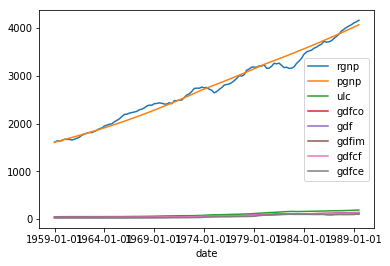

In [31]:
dataset= pd.read_csv('/home/rupeshr/Desktop/TSA_Python/dataset/Raotl6.csv')
dataset.drop('Unnamed: 0', axis=1, inplace=True)
dataset.set_index('date',inplace=True)
dataset.plot()

In [32]:
from statsmodels.tsa.stattools import grangercausalitytests

In [33]:
#The granger causaulity test is a statistical hypothesis test for determining whether 
                                                            # one time series is usefull in forecasting another.
#define our hypothesis statement
#H0: Xt does not granger causes Yt
#H1: Xt granger causes Yt
#p value < 0.05 is significant

In [34]:
def grangers_causality_matrix(*,data, variables, maxlag, test, verbose=False):

    dataset = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)

    for c in dataset.columns:
        for r in dataset.index:
            test_result = grangercausalitytests(data[[r,c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            min_p_value = np.min(p_values)
            dataset.loc[r,c] = min_p_value

    dataset.columns = [var + '_x' for var in variables]

    dataset.index = [var + '_y' for var in variables]

    return dataset

In [35]:
max_lag=4 #how much lag past i want to go
type_test = 'ssr_chi2test' #ssr_ftest
output= grangers_causality_matrix(data=dataset, variables = dataset.columns, maxlag=int(max_lag), test=type_test)  

In [36]:
output # based on p-values take all relevant features for forecasting

,rgnp_x,pgnp_x,ulc_x,gdfco_x,gdf_x,gdfim_x,gdfcf_x,gdfce_x
rgnp_y,1.0000,0.1110,0.0001,0.0360,0.0093,0.1846,0.0533,0.1575
pgnp_y,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
ulc_y,0.0000,0.0000,1.0000,0.0002,0.0000,0.0000,0.0000,0.0452
gdfco_y,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000
gdf_y,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0022
gdfim_y,0.0011,0.0067,0.0014,0.0083,0.0017,1.0000,0.0056,0.0000
gdfcf_y,0.0000,0.0000,0.0008,0.0008,0.0000,0.0057,1.0000,0.0030
gdfce_y,0.0261,0.0485,0.0000,0.0002,0.0000,0.0000,0.0005,1.0000


In [ ]:
#for multivariate we dont want more features if we use more we need to do more backtesting for each and every features.
            #for that i am checking which are relevant that possibly causes y-variable that feature we going to add it for forecasting.